Example D
A 3 m high and 5 m wide wall consists of long 16 cm 22 cm cross section horizontal bricks (k =0.72 W/m · °C) separated by 3 cm thick plaster layers (k =0.22 W/m · °C).

There are also 2 cm thick plaster layers on each side of the brick and a 3-cm-thick rigid foam (k 0.026 W/m · °C) on the inner side of the wall

The indoor and the outdoor temperatures are 20°C and -10°C, and the convection heat transfer coefficients on the inner and the outer sides are h1=10 W/m2 · °C and h2 =40W/m2 · °C, respectively.

Assuming one-dimensional heat transfer and disregarding radiation, determine the rate of heat transfer through the wall.

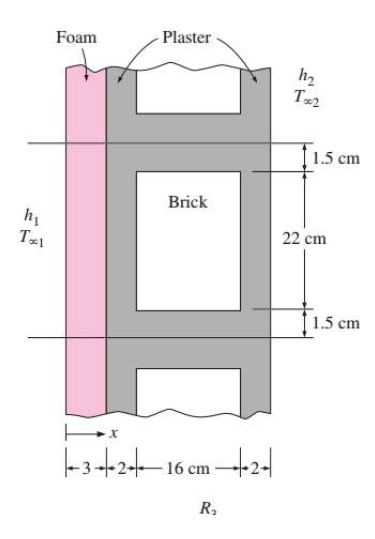

In [55]:
import pandas as pd

In [56]:
A_unit = 0.25
A_wall = 15
A = [0.25,0.25,0.25,0.015,0.22, 0.015,0.25,0.25]
Materials = ["outer_wall","Foam","Plaster1","Plaster2 + Brick","Plaster2 + Brick","Plaster2 + Brick","Plaster1","Inner_wall"]
Type = ["conv","cond","cond","cond","cond","cond","cond","conv"]
L = [None, 0.03, 0.02, 0.16, 0.16,0.16, 0.02, None]
k = [None, 0.026, 0.22, 0.22, 0.72,0.22, 0.22, None]
h = [10, None, None, None, None, None,None, 40]
RValue = [0,0,0,0,0,0,0,0]
Resistance_names = ["R1","R2","R3","R4","R5","R6","R7","R8"]
resistancelistoflists = [A,Materials,Type,L,k,h,RValue]
resistancelistoflists

[[0.25, 0.25, 0.25, 0.015, 0.22, 0.015, 0.25, 0.25],
 ['outer_wall',
  'Foam',
  'Plaster1',
  'Plaster2 + Brick',
  'Plaster2 + Brick',
  'Plaster2 + Brick',
  'Plaster1',
  'Inner_wall'],
 ['conv', 'cond', 'cond', 'cond', 'cond', 'cond', 'cond', 'conv'],
 [None, 0.03, 0.02, 0.16, 0.16, 0.16, 0.02, None],
 [None, 0.026, 0.22, 0.22, 0.72, 0.22, 0.22, None],
 [10, None, None, None, None, None, None, 40],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [57]:
resistance_DF = pd.DataFrame(resistancelistoflists,index=["A","Materials","type","L","K","h","RValue"], columns=Resistance_names)

In [58]:
resistance_DF

,R1,R2,R3,R4,R5,R6,R7,R8
A,0.25,0.25,0.25,0.015,0.22,0.015,0.25,0.25
Materials,outer_wall,Foam,Plaster1,Plaster2 + Brick,Plaster2 + Brick,Plaster2 + Brick,Plaster1,Inner_wall
type,conv,cond,cond,cond,cond,cond,cond,conv
L,None,0.03,0.02,0.16,0.16,0.16,0.02,None
K,None,0.026,0.22,0.22,0.72,0.22,0.22,None
h,10,None,None,None,None,None,None,40
RValue,0,0,0,0,0,0,0,0


In [59]:
resistance_DF = resistance_DF.transpose()


In [60]:
resistance_DF

,A,Materials,type,L,K,h,RValue
R1,0.25,outer_wall,conv,None,None,10,0
R2,0.25,Foam,cond,0.03,0.026,None,0
R3,0.25,Plaster1,cond,0.02,0.22,None,0
R4,0.015,Plaster2 + Brick,cond,0.16,0.22,None,0
R5,0.22,Plaster2 + Brick,cond,0.16,0.72,None,0
R6,0.015,Plaster2 + Brick,cond,0.16,0.22,None,0
R7,0.25,Plaster1,cond,0.02,0.22,None,0
R8,0.25,Inner_wall,conv,None,None,40,0


In [61]:
Convection = resistance_DF.loc[:,"type"] == "conv"
Conduction = resistance_DF.loc[:,"type"] == "cond"

In [62]:
resistance_DF.loc[Convection,"RValue"] = 1/(resistance_DF.loc[Convection,"h"]*resistance_DF.loc[Convection,"A"])
resistance_DF.loc[Conduction,"RValue"] = resistance_DF.loc[Conduction,"L"]/(resistance_DF.loc[Conduction,"K"]*resistance_DF.loc[Conduction,"A"])

In [63]:
resistance_DF

,A,Materials,type,L,K,h,RValue
R1,0.25,outer_wall,conv,None,None,10,0.4
R2,0.25,Foam,cond,0.03,0.026,None,4.61538
R3,0.25,Plaster1,cond,0.02,0.22,None,0.363636
R4,0.015,Plaster2 + Brick,cond,0.16,0.22,None,48.4848
R5,0.22,Plaster2 + Brick,cond,0.16,0.72,None,1.0101
R6,0.015,Plaster2 + Brick,cond,0.16,0.22,None,48.4848
R7,0.25,Plaster1,cond,0.02,0.22,None,0.363636
R8,0.25,Inner_wall,conv,None,None,40,0.1


In [64]:
parallel = resistance_DF.loc[:,"Materials"] == "Plaster2 + Brick"
Series = resistance_DF.loc[:,"Materials"] != "Plaster2 + Brick"

In [65]:
R_series_Total = sum(resistance_DF.loc[Series,"RValue"])
R_series_Total


5.8426573426573425

In [66]:
R_parallel_1 = sum(1/resistance_DF.loc[parallel,"RValue"])
R_parallel_total = 1/R_parallel_1
R_parallel_total

0.96969696969697

In [67]:
R_total = R_parallel_total+R_series_Total
R_total

6.812354312354312

In [68]:
T_infinit_1 = 20
T_infinity_2 = -10
Delta_T = T_infinit_1 - T_infinity_2
Delta_T

30

In [69]:
Q_unit = Delta_T/R_total
Q_total = Q_unit*(A_wall/A_unit)
print("Total Heat transfer = "+str(Q_total)+" W")

Total Heat transfer = 264.2258340461933 W
